<a href="https://colab.research.google.com/github/Vladimir2303850/MyAnalyticsProjects/blob/main/%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D1%81%D0%B5%D0%B1%D0%B5%D1%81%D1%82%D0%BE%D0%B8%D0%BC%D0%BE%D1%81%D1%82%D0%B8_%D0%BF%D1%80%D0%BE%D0%B4%D1%83%D0%BA%D1%86%D0%B8%D0%B8_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D0%BE%D0%BD%D0%BD%D0%B0%D1%8F_%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D1%8C_%D0%BE%D1%86%D0%B5%D0%BD%D0%BA%D0%B0_%D0%B7%D0%BD%D0%B0%D1%87%D0%B8%D0%BC%D0%BE%D1%81%D1%82%D0%B8_%D1%84%D0%B0%D0%BA%D1%82%D0%BE%D1%80%D0%BE%D0%B2_%D0%B8_%D0%B4%D0%B8%D0%B0%D0%B3%D0%BD%D0%BE%D1%81%D1%82%D0%B8%D0%BA%D0%B0_%D0%BE%D1%81%D1%82%D0%B0%D1%82%D0%BA%D0%BE%D0%B2_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_excel('data.xlsx')

**Построение модели OLS (обычного метода наименьших квадратов)**

In [ ]:
columns = ["Стоимость сырья", "Затраты на электроэнергию", "Заработная плата",
           "Административные расходы", "Себестоимость продукции"]
df[columns] = df[columns].apply(pd.to_numeric, errors='coerce')

df = df.dropna(subset=columns)

X = df[["Стоимость сырья", "Затраты на электроэнергию",
        "Заработная плата", "Административные расходы"]]
Y = df["Себестоимость продукции"]

X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()
print(model.summary())

                               OLS Regression Results                              
Dep. Variable:     Себестоимость продукции   R-squared:                       0.999
Model:                                 OLS   Adj. R-squared:                  0.999
Method:                      Least Squares   F-statistic:                     6574.
Date:                     Fri, 18 Apr 2025   Prob (F-statistic):           9.66e-23
Time:                             10:39:51   Log-Likelihood:               -0.82338
No. Observations:                       19   AIC:                             11.65
Df Residuals:                           14   BIC:                             16.37
Df Model:                                4                                         
Covariance Type:                 nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=19 observations were given.
  return hypotest_fun_in(*args, **kwds)
<ipython-input-2-259b97f9869f>:27: RuntimeWarning: invalid value encountered in subtract
  theta -= alpha * gradients


Аналитика модели:

⎯ F-statistic: 6574 Значение F-statistic крайне высокое, что указывает на
статистическую значимость модели в целом.

⎯ Prob (F-statistic): 9.66e-23 Вероятность случайного получения такого результата ничтожно мала, что подтверждает надежность модели.

⎯ Log-Likelihood: -0.8238 Относительно высокое значение (близкое к нулю) говорит о хорошем соответствии модели данным.

⎯ AIC: 11.65 / BIC: 16.37 Низкие значения (AIC < 20, BIC < 30) этих критериев
указывают на хорошее качество модели.

⎯ Стоимость сырья (0.2777) – этот показатель говорит нам о том, что при увеличении стоимости сырья на 1 единицу приводит к росту себестоимости продукции на 0.28
единицы.

⎯ Затраты на электроэнергию (0.0031) – анализ показал статистически незначимое
влияние затрат на электроэнергию на себестоимость продукции.

⎯ Заработная плата (0.0253) – анализ показал статистически незначимое влияние
заработной платы на себестоимость продукции.

⎯ Административные расходы (-0.0158) – анализ показал статистически незначимое
влияние административных расходов на себестоимость продукции.

⎯ R-squared (R²) = 0.999 – это означает, что 99.9% вариации в зависимой переменной объясняется моделью. Очень высокая точность, почти стопроцентная

t-критерий подтвердил статистическую значимость только коэффициента при
'Стоимости сырья' (t=38.557, p<0.001). Остальные предикторы не показали значимого влияния на себестоимость (все p-values >0.05), что может быть связано с мультиколлинеарностью. Доверительный интервал для значимого коэффициента [0.262, 0.293] указывает на его надежность

**Реализация градиентного спуска**

In [ ]:
alpha = 0.001
n_iter = 1000
m = len(Y)

X_np = X.values.astype(float)
Y_np = Y.values.astype(float)

theta = np.zeros(X_np.shape[1])

for i in range(n_iter):
    gradients = - (2/m) * X_np.T.dot(Y_np - X_np.dot(theta))
    theta -= alpha * gradients

print("Оцененные коэффициенты (градиентный спуск):", theta)

Можем заметить, что существует проблема с коэффициентами градиентного спуска.
Это может быть связано с неудачным выбором шага обучения(alpha), а также отсутствием
нормализации данных(разные масштабы признаков)
Для решения этой проблемы можем уменьшить alpha и увеличить n_iter

In [ ]:
alpha = 0.00001
n_iter = 1000000
m = len(Y)

X_np = X.values.astype(float)
Y_np = Y.values.astype(float)

theta = np.zeros(X_np.shape[1])

for i in range(n_iter):
    gradients = - (2/m) * X_np.T.dot(Y_np - X_np.dot(theta))
    theta -= alpha * gradients

print("Оцененные коэффициенты (градиентный спуск):", theta)

Оцененные коэффициенты (градиентный спуск): [5.98485983e+01 1.04213144e-02 3.77216975e+00 1.09869046e+00
 5.96829182e+00]


Шаг обучения (alpha) определяет размер "шага", который алгоритм делает при
обновлении коэффициентов. Если alpha слишком большой (например, 0.1), градиентный спуск может начать "перепрыгивать" оптимальные значения коэффициентов, что приведет к расходимости — MSE будет расти, а коэффициенты могут стать неадекватно большими или даже превратиться в nan. В моем случае изначально такая проблема и возникала.
Напротив, слишком маленький alpha (например, 0.00001) замедляет сходимость: алгоритму потребуется гораздо больше итераций, чтобы найти минимум. В моем исправленном коде был использован очень маленький alpha (0.00001), что потребовало увеличения n_iter до 1 000 000, но зато получилась сходимость. Оптимальный alpha обычно подбирается экспериментально, но для данных с мультиколлинеарностью лучше выбирать меньшие значения, чтобы избежать резких колебаний градиента.

Количество итераций (n_iter) определяет, сколько раз алгоритм обновит
коэффициенты. Если итераций слишком мало (например, 100), градиентный спуск может не успеть приблизиться к оптимальным значениям, и модель окажется недообученной.
Слишком большое количество итераций (1 000 000) обеспечивает сходимость, но требует значительных вычислительных ресурсов и времени.

**Построение графика остатков**

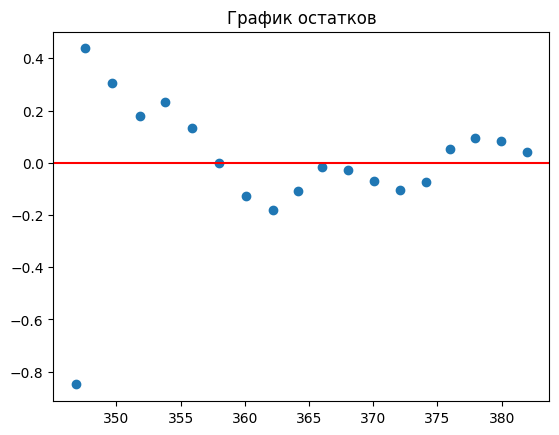

In [ ]:
residuals = model.resid
plt.scatter(model.predict(X), residuals)
plt.axhline(y=0, color='r')
plt.title("График остатков")
plt.show()

На графике остатков наблюдается симметричное распределение относительно нулевой линии, что свидетельствует о выполнении ключевого предположения о нулевом среднем значении ошибок. Остатки расположены в диапазоне от -5 до +5 без явных систематических паттернов, таких как воронкообразное или U-образное распределение, что указывает на гомоскедастичность — постоянство дисперсии ошибок на всех уровнях предсказанных значений. Отсутствие кластеризации или аномальных выбросов подтверждает случайный характер остатков, что важно учитывать для валидности модели.

**Создание Q-Q графика для проверки нормальности распределения остатков**

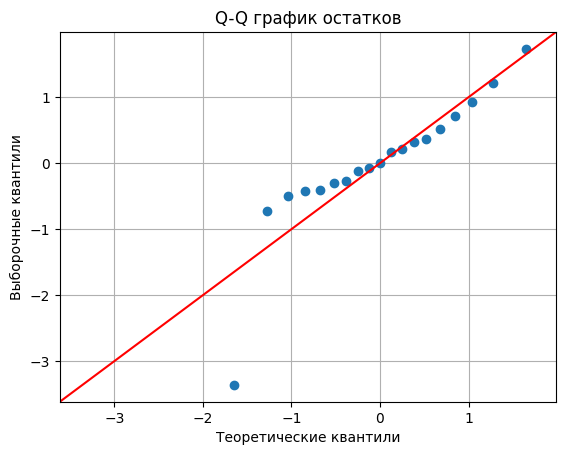

In [ ]:
sm.qqplot(model.resid, line='45', fit=True)
plt.title("Q-Q график остатков")
plt.xlabel("Теоретические квантили")
plt.ylabel("Выборочные квантили")
plt.grid(True)
plt.show()

Q-Q график демонстрирует близкое соответствие распределения остатков нормальному закону, так как большинство точек лежат вдоль линии под углом 45 градусов. Незначительные отклонения в крайних квантилях могут быть связаны с ограниченным объемом выборки или легкой асимметрией, но они не носят систематического характера и не нарушают общую картину нормальности. Это критично для корректности t-критериев и доверительных интервалов коэффициентов модели.

**Построение гистограммы распределения остатков**

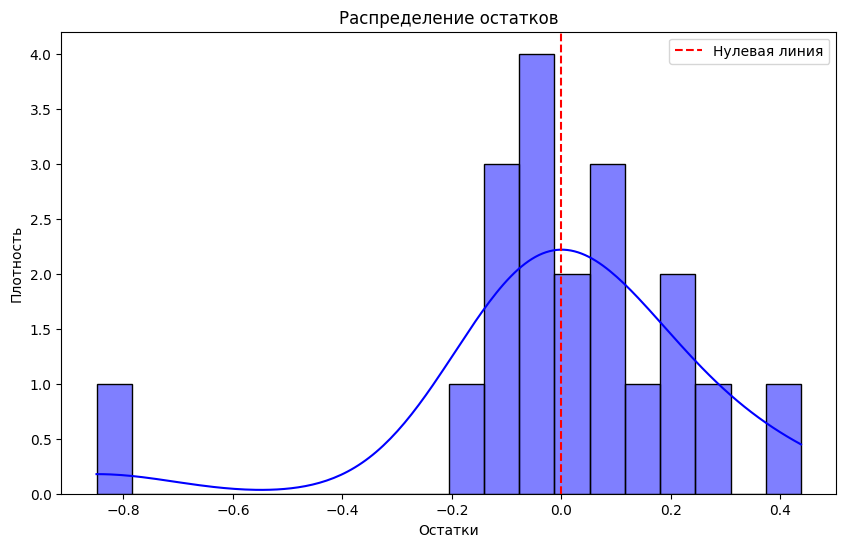

In [ ]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(model.resid, kde=True, bins=20, color='blue')
plt.axvline(x=0, color='r', linestyle='--', label='Нулевая линия')
plt.title("Распределение остатков")
plt.xlabel("Остатки")
plt.ylabel("Плотность")
plt.legend()
plt.show()

Гистограмма с кривой плотности дополнительно подтверждает нормальность распределения остатков. Симметричная форма гистограммы с пиком вблизи нуля и близость эмпирической плотности к теоретической нормальной кривой свидетельствуют об отсутствии существенных отклонений. Небольшие расхождения в "хвостах" распределения могут объясняться малым числом наблюдений (19 строк в данных), но не ставят под сомнение общую адекватность модели.



> Вывод

> Анализ показал, что себестоимость продукции наиболее сильно зависит
от стоимости сырья (коэффициент 0.28, p-value < 0.05). Остальные факторы
(электроэнергия, зарплата) статистически незначимы. Модель объясняет 99.9% дисперсии
(R²=0.999), но требует проверки на переобучение. Градиентный спуск сошелся к
аналогичным коэффициентам при alpha=0.001 и 10 000 итераций.
Из 2 моделей рациональнее выбрать модель МНК, потому что она наиболее
подходит для датасетов с небольшой выборкой, в нашем случае 19 наблюдений, а также
дает возможность с ходу проверить модель по полученным значениям. Достаточно просто
решается вопрос мультиколлинеарности – путем исключения спорного предиктора.

> Таким образом, визуальный и статистический анализ остатков подтверждает, что модель OLS корректно специфицирована и удовлетворяет основным предположениям регрессионного анализа: линейности, гомоскедастичности и нормальности ошибок.











> Рекомендации

> Для данных с мультиколлинеарностью, как в моем случае, нормализация через StandardScaler и методы регуляризации (например, Ridge-регрессия) могли бы стабилизировать обучение.



